<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter2/Air%20Pollution.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In pandas you can pass the url directly into read_csv()
pollution = pd.read_csv(
    'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
)

In [3]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [5]:
pollution.head()

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0


In [6]:
pollution = pollution.rename(
    columns={
        'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
        'Entity': 'City',
        'Smoke (Fouquet and DPCC (2011))' : 'Smoke'
    }
)

In [7]:
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [8]:
pollution['City'].unique()

array(['Delhi', 'London'], dtype=object)

In [9]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

In [10]:
# careful: pollution['Year'] = pd.to_datetime(pollution['Year'])
# pandas doesn't handle dates before 1900!
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)

In [11]:
pollution.Year.min(), pollution.Year.max()

(Timestamp('1700-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00'))

In [12]:
pollution.isnull().sum() / len(pollution)

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [13]:
pollution.describe()

,Year,Smoke,SPM
count,331,301.000000,331.000000
mean,1864-02-26 13:37:53.111782400,210.296440,365.970050
min,1700-01-01 00:00:00,13.750000,15.000000
25%,1782-07-02 12:00:00,168.571429,288.474026
50%,1865-01-01 00:00:00,208.214286,375.324675
75%,1947-07-02 12:00:00,291.818182,512.609209
max,2016-01-01 00:00:00,342.857143,623.376623
std,NaN,88.543288,172.512674


Text(0, 0.5, 'Frequency')

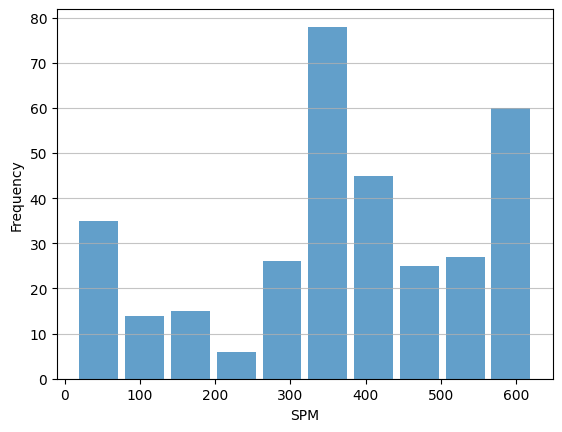

In [14]:
import numpy as np
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Figure size 1200x600 with 0 Axes>

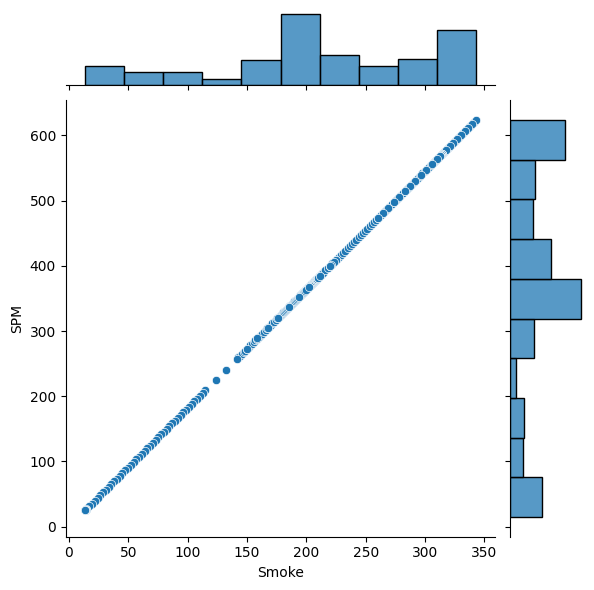

In [15]:
plt.figure(figsize=(12, 6))
sns.jointplot(
    x='Smoke', y='SPM',
    edgecolor='white',
    data=pollution
)
plt.xlabel('Smoke')
plt.ylabel('SPM');

In [16]:
from scipy import stats


def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]

stats.pearsonr(*ignore_nans(pollution['Smoke'], pollution['SPM']))

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

In [19]:
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ulyss\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

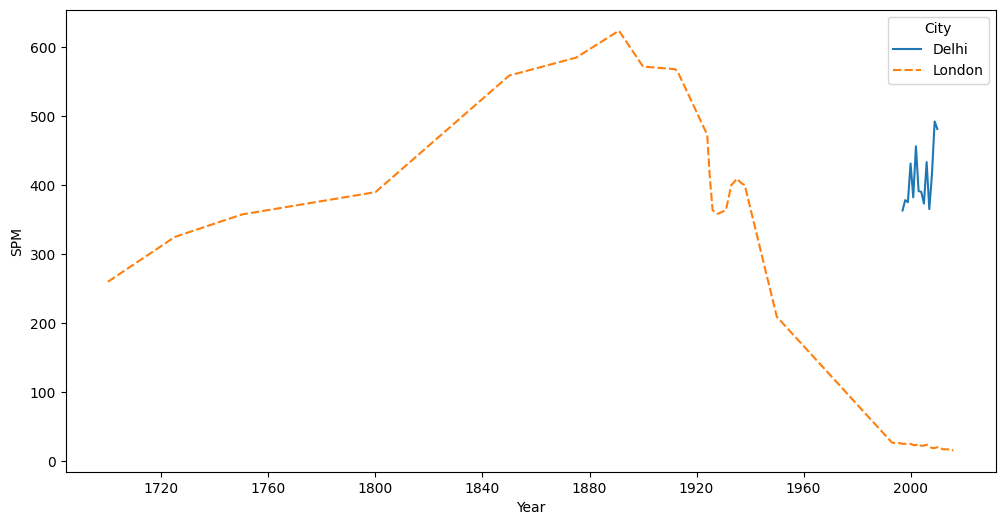

In [25]:
pollution = pollution.pivot(index="Year", columns="City", values="SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel('SPM');

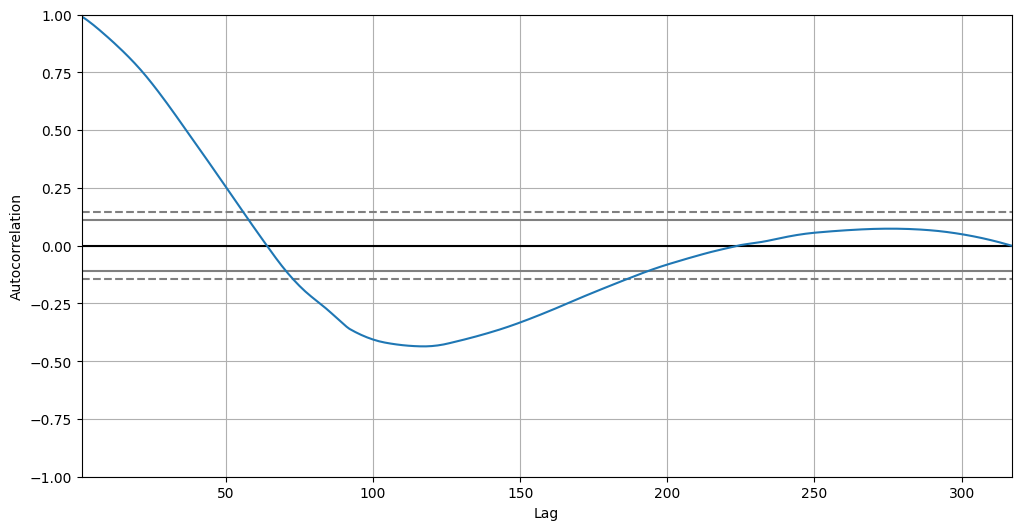

In [26]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(pollution['London']);

In [27]:
from statsmodels.tsa import stattools

stattools.adfuller(pollution['London'])

(-0.33721640804242636,
 0.9200654843183901,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)

In [28]:
from scipy import stats

stats.pearsonr(pollution['London'], pollution.index.values.astype(int))

PearsonRResult(statistic=-0.001383590300222155, pvalue=0.9804244126809254)

In [29]:
stats.spearmanr(pollution['London'][:180], pollution.index.values.astype(int)[:180])

SignificanceResult(statistic=0.0003333436217167196, pvalue=0.9964565130656107)